In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

In [2]:
Nx, Ny = 100, 50
et = 10.0

def load(Nx,Ny,et):
    base_fn = 'output_rising_bubble'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

2
[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]


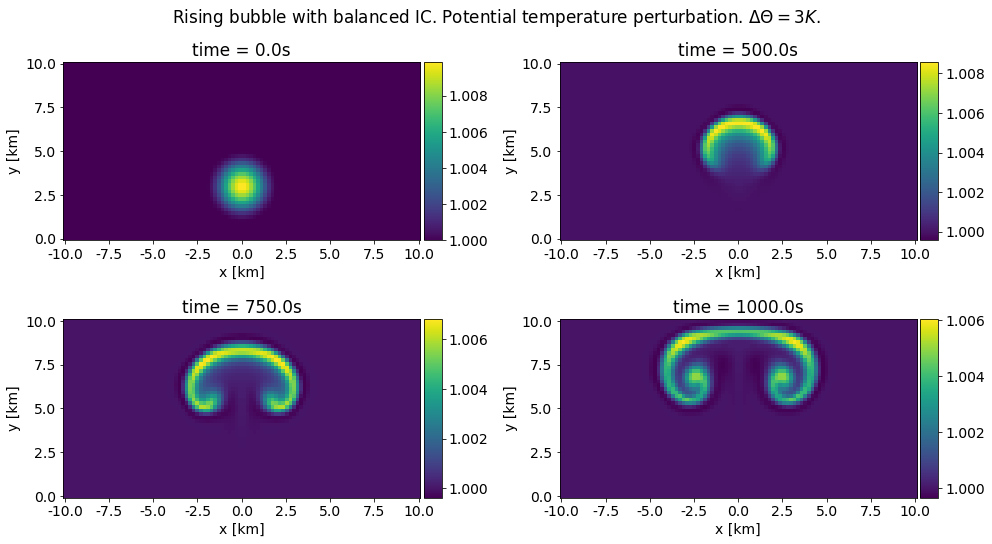

In [16]:
N = 1
sfx = 'comp_ref'
# sfx = 'cold_psinc_ref'
sfx = 'psinc_ref'
sfx = 'ip_ref'

fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
attributes = ['rhoY', 'rho']
# attributes = ['p2_nodes']

times = [0.0,5.0,7.5,10.0]
# times = [0.0]
ltags = ['ic',tags[9],tags[9],tags[9]]
ldicts = pt.labels()

t_lbl = 'TIME'
arr_lst = []

class oo(object):
    def __init__(self):
        None
        
oo = oo()

for tt,time in enumerate(times):
    tag = ltags[tt]
    for atr_idx, attribute in enumerate(attributes):
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0]
        arr = arr.T
        
        setattr(oo,attribute,arr)
        
    arr_lst.append([oo.rhoY / oo.rho,"time = %.1fs" %(time*100)])
#     arr_lst.append([oo.p2_nodes, "time = %.1fs" %(time*100)])
#     arr_lst.append(oo.p2_nodes)
    
# arr_lst = np.array(arr_lst)
# diff_lst = arr_lst[1:] - arr_lst[:-1]
# arr_lst = [[t_arr,nn] for nn,t_arr in enumerate(diff_lst)]

ncolslen = int(len(times) * len(attributes) / 4)
print(ncolslen)
fs = (14,8)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

x_axs = np.arange(-10.0,12.5,2.5)
print(x_axs)
y_axs = np.arange(0,12.5,2.5)
x_loc = np.linspace(0,Nx-1,len(x_axs))
y_loc = np.linspace(0,Ny-1,len(y_axs))
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

st = "Rising bubble with balanced IC. Potential temperature perturbation. $\Delta \Theta = 3K$."
_ = pl.plot(aspect='equal',method='imshow',suptitle=st)
pl.save_fig('../img/rb_%s' %sfx)

# Ensemble plotter

ip_noda
(1, 10, 101, 51)
(101, 51)
5
5


IndexError: list index out of range

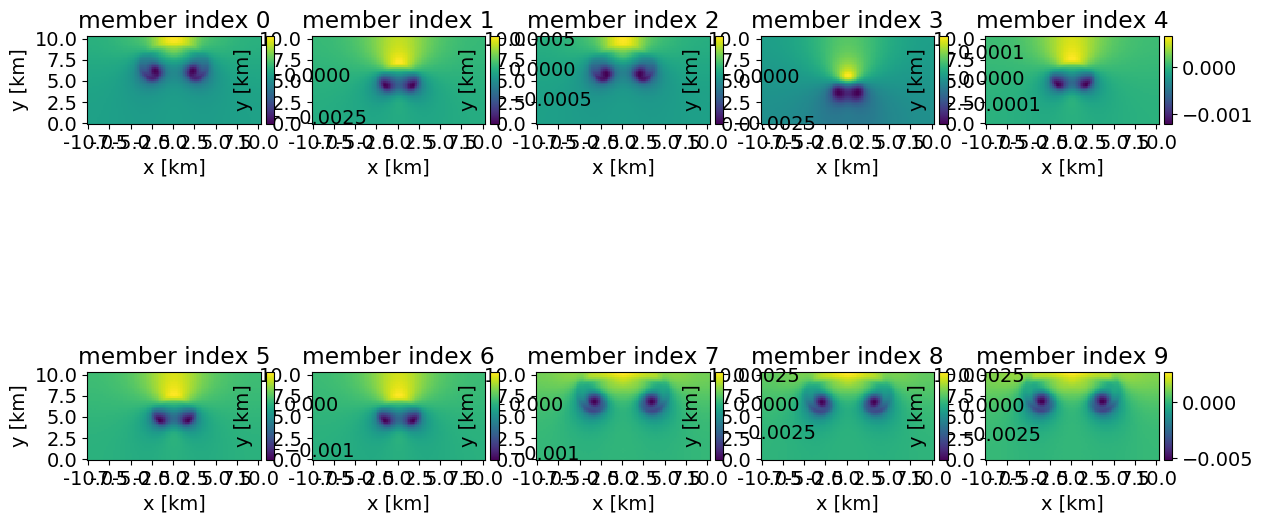

In [100]:
import random

random.seed(444)

N = 10
sfx = "ip_noda"
# sfx = 'ip'
ens_3_suffix = 'ip_obs_comp_wdawloc_1.0'
sfx = tc.cb_suffix(1,0, '%s' %(ens_3_suffix))
sfx = 'ip_obs_comp_wdawloc_1.0'
sfx = 'ip_noda'
# sfx = 'noda'
print(sfx)
attribute = 'p2_nodes'
times = [10.0]
# times = [0.1,1.0,2.0]
# times = [0.1,0.2,0.3]

ens = tc.get_ensemble(times, N, attribute, sfx)
print(ens.shape)
mean = np.mean(ens[0],axis=0)
print(np.array(mean).shape)
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()

for ens_at in ens:
    ncolslen = int((ens_at.shape)[0]/2)
    print(ncolslen)
#     fs = (18,6)
    fs = (14,8)
    
    arr_lst = [[arr.T,'member index %i' %n] for n,arr in enumerate(ens_at)]
#     arr_lst = random.sample(arr_lst, k=3)
    arr_lst.append(mean)
    ncolslen = int(len(arr_lst)/2)
    print(ncolslen)
    
    pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

    x_axs = np.arange(-10.0,12.5,2.5)
    y_axs = np.arange(0,12.5,2.5)
    x_loc = np.linspace(0,Nx-1,len(x_axs))
    y_loc = np.linspace(0,Ny-1,len(y_axs))
    x_label = r'x [km]'
    y_label = r'y [km]'

    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

    st = "Compressible rising bubble. Quantity is %s." %attr_labels[attribute]
    _ = pl.plot(aspect='equal',method='imshow',suptitle=st)
    pl.save_fig('../img/rb_ens_%s' %sfx)

# Effects of observation covariance and ensemble spread

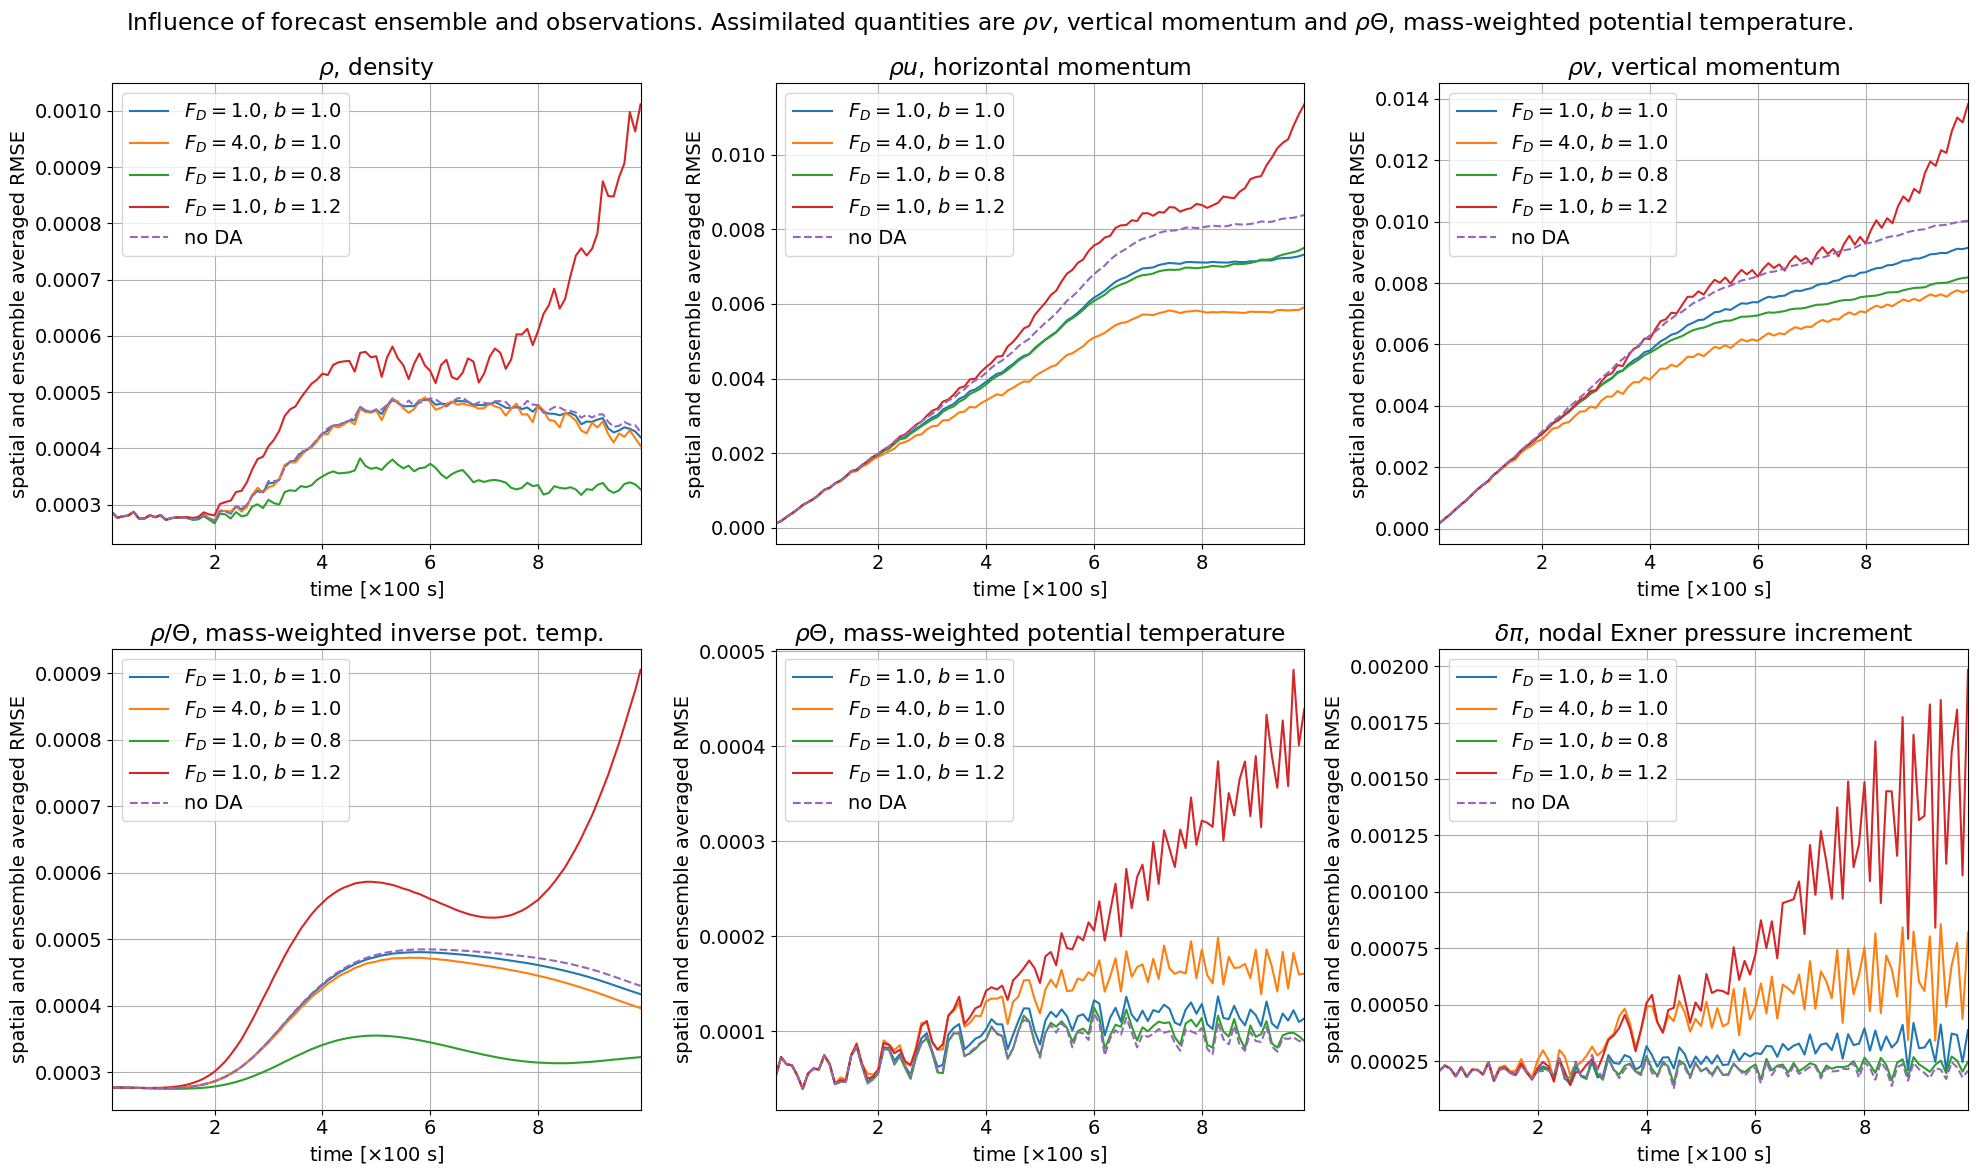

In [261]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_obs_covar_ensemble_spread'
title = 'Influence of forecast ensemble and observations'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY'
    ens_1_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,1.0)
    
    ens_2_suffix = 'obs_psinc_wdawloc_4.0_rhov_rhoY'
    ens_2_label = r'$F_D=$%.1f, $b=$%.1f' %(4.0,1.0)

    ens_3_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY_inflation_0.8'
    ens_3_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,0.8)
    
    ens_4_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY_inflation_1.2'
    ens_4_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,1.2)

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rhov'], attr_labels['rhoY']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
    ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

# Effects of localisation

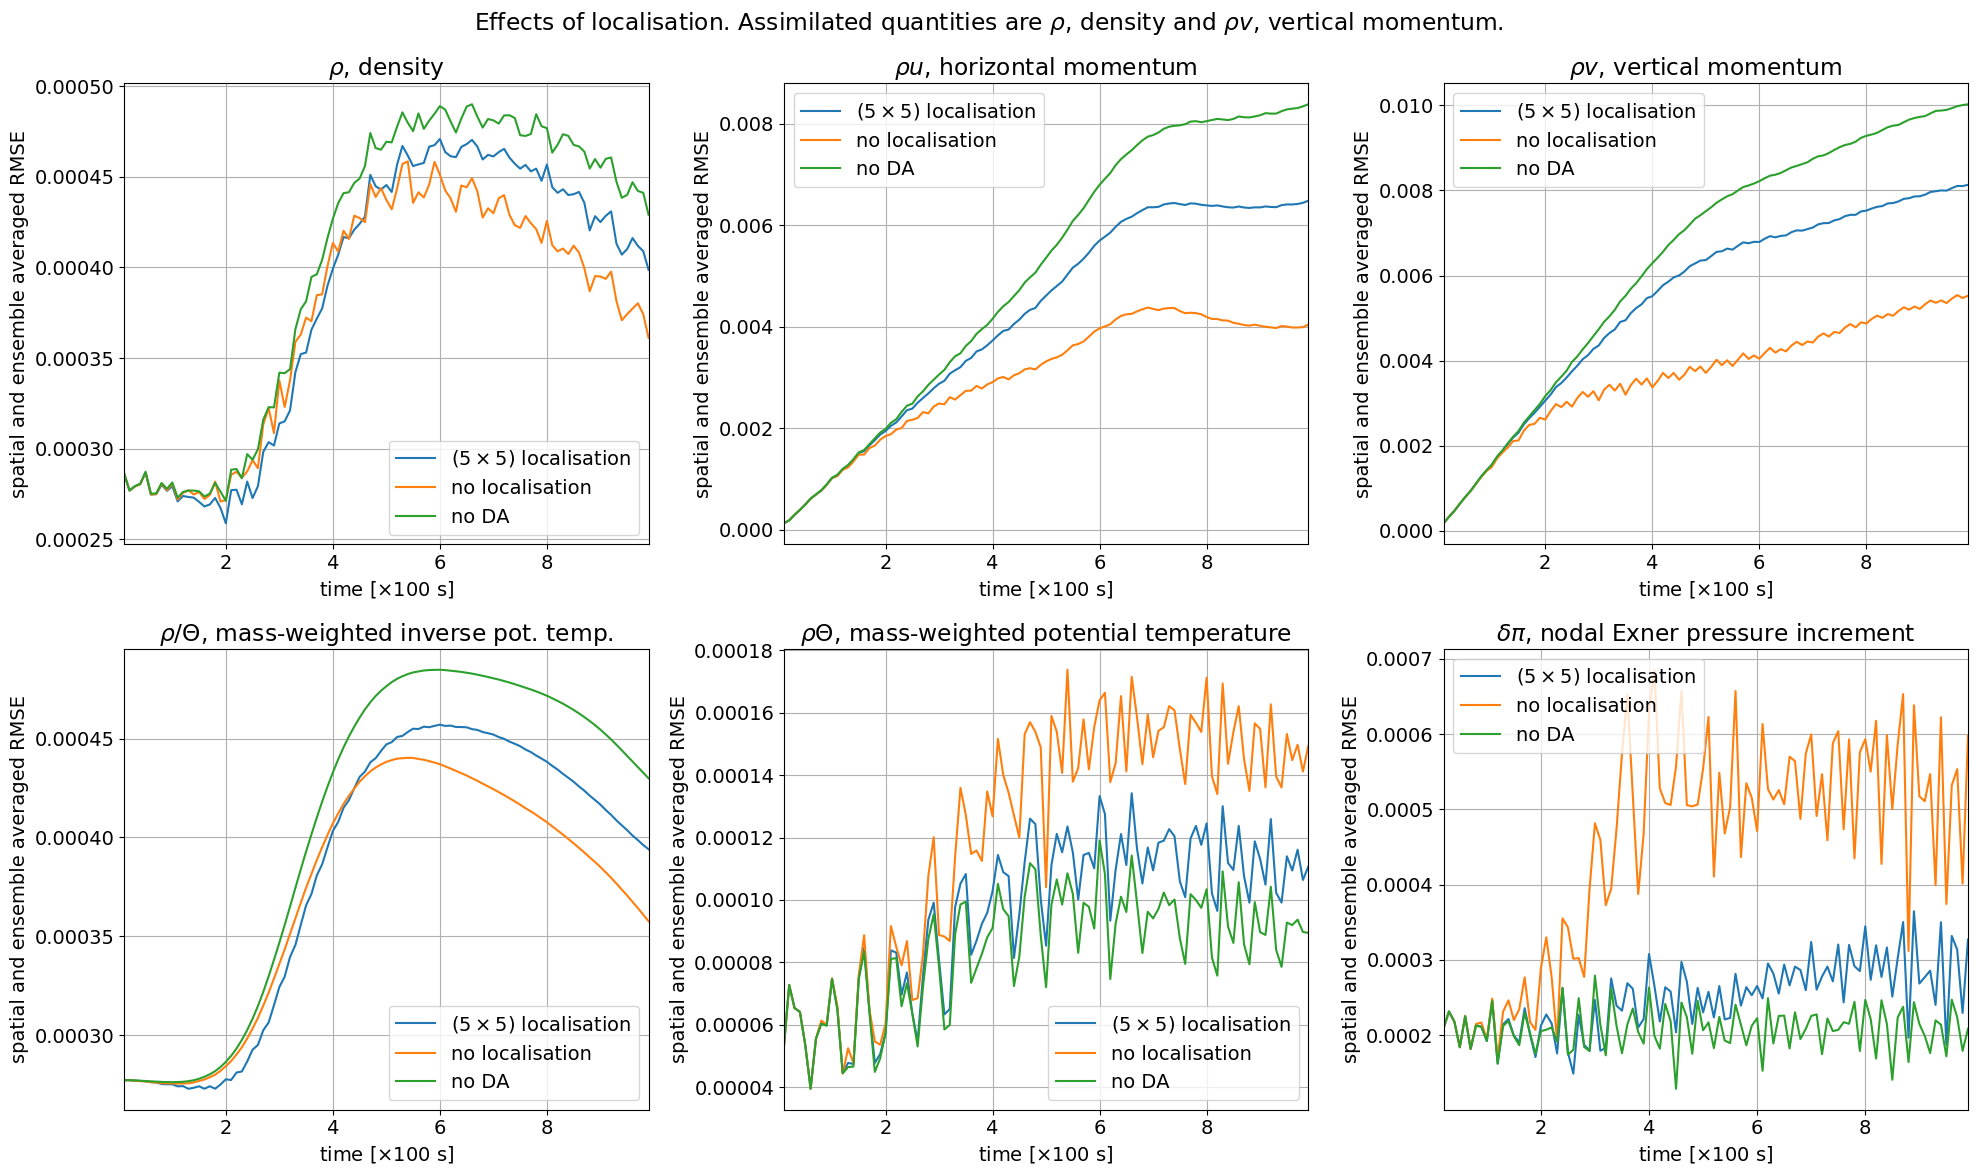

In [263]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')
# plt.style.use('seaborn-dark-palette')
# plt.style.use('seaborn-pastel')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [50,25]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_localisation'
title = 'Effects of localisation'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

rmse_type = 'probe'
rmse_type = 'spatial'
# rmse_type = 'loc'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_psinc_wdawloc_1.0_rho_rhov'
    ens_1_label = r'$(5\times5)$ localisation'
    
    ens_2_suffix = 'obs_psinc_wdawoloc_1.0_rho_rhov'
    ens_2_label = r'no localisation'

#     ens_3_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY'
#     ens_3_label = r'{%s,%s}' %(attr_shorts['rhov'],attr_shorts['rhoY'])
    
#     ens_4_suffix = 'obs_psinc_wdawloc_1.0_rhov_p2_nodes'
#     ens_4_label = r'{%s,%s}' %(attr_shorts['rhov'],attr_shorts['p2_nodes'])

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
#     ens_3 = get_ens(ens_3_suffix, diff)
#     ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
#         diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
#         diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
#         diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
#         diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))

    elif rmse_type == 'loc':
        diff_noda = ens_noda[:,probe_idx[0],probe_idx[1]]
        diff_ens_1 = ens_1[:,probe_idx[0],probe_idx[1]]
        diff_ens_2 = ens_2[:,probe_idx[0],probe_idx[1]]
        ax.set_ylabel('%s' %attr_shorts[attribute])
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
#     ax.plot(times,diff_ens_3, label=ens_3_label)
#     ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, label=ens_noda_label)
#     ax.plot(times,psinc[:, probe_idx[0], probe_idx[1]], '--', label='ref. sol.')

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s_%s.pdf' %(py_directory,fn,rmse_type))
plt.show()

# Effects of assimilated fields

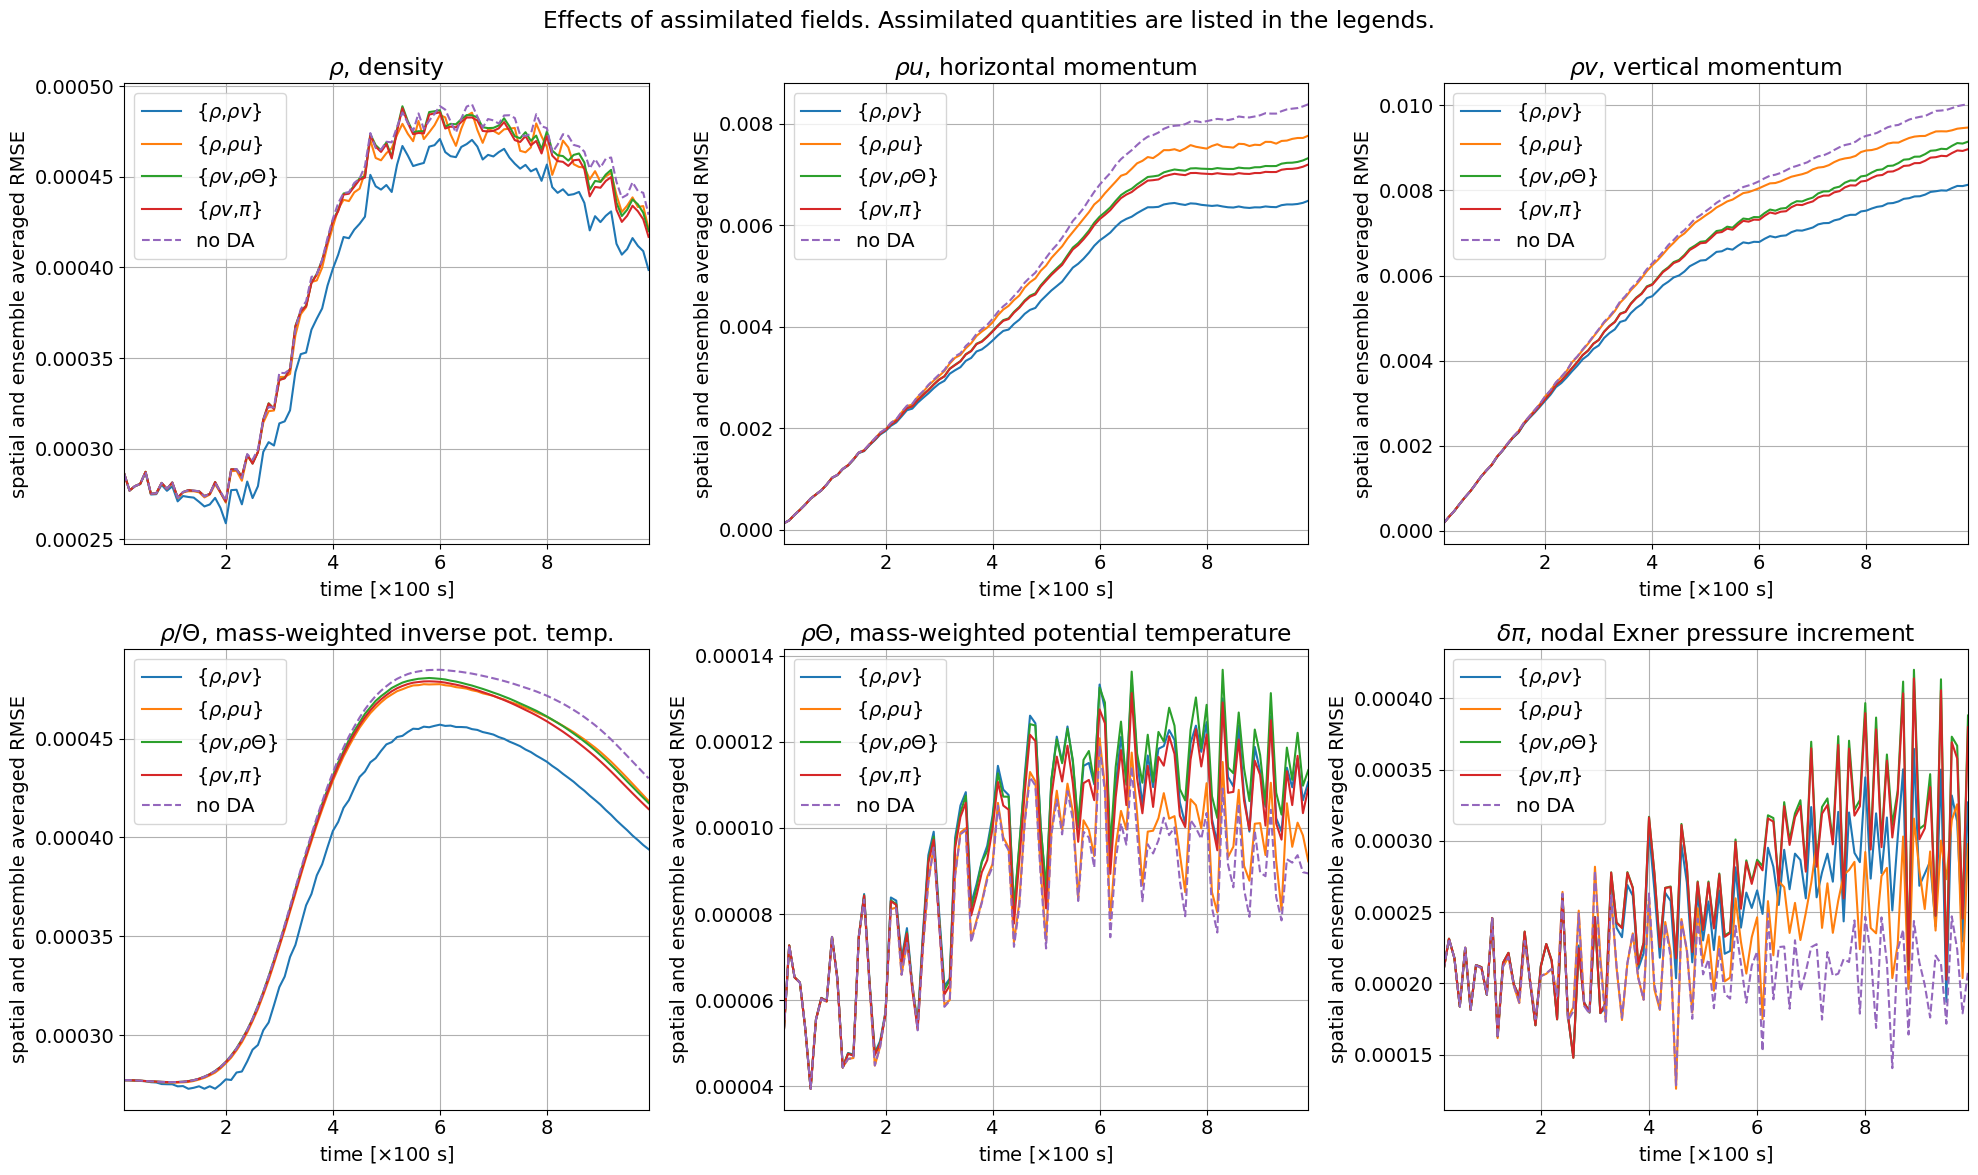

In [264]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_fields'
title = 'Effects of assimilated fields'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_psinc_wdawloc_1.0_rho_rhov'
    ens_1_label = r'{%s,%s}' %(attr_shorts['rho'],attr_shorts['rhov'])
    
    ens_2_suffix = 'obs_psinc_wdawloc_1.0_rho_rhou'
    ens_2_label = r'{%s,%s}' %(attr_shorts['rho'],attr_shorts['rhou'])

    ens_3_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY'
    ens_3_label = r'{%s,%s}' %(attr_shorts['rhov'],attr_shorts['rhoY'])
    
    ens_4_suffix = 'obs_psinc_wdawloc_1.0_rhov_p2_nodes'
    ens_4_label = r'{%s,%s}' %(attr_shorts['rhov'],attr_shorts['p2_nodes'])


    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
#         diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
#         plt.suptitle("%s. Assimilated quatities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
        plt.suptitle("%s. Assimilated quantities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
    ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

# Effects of assimilation window length

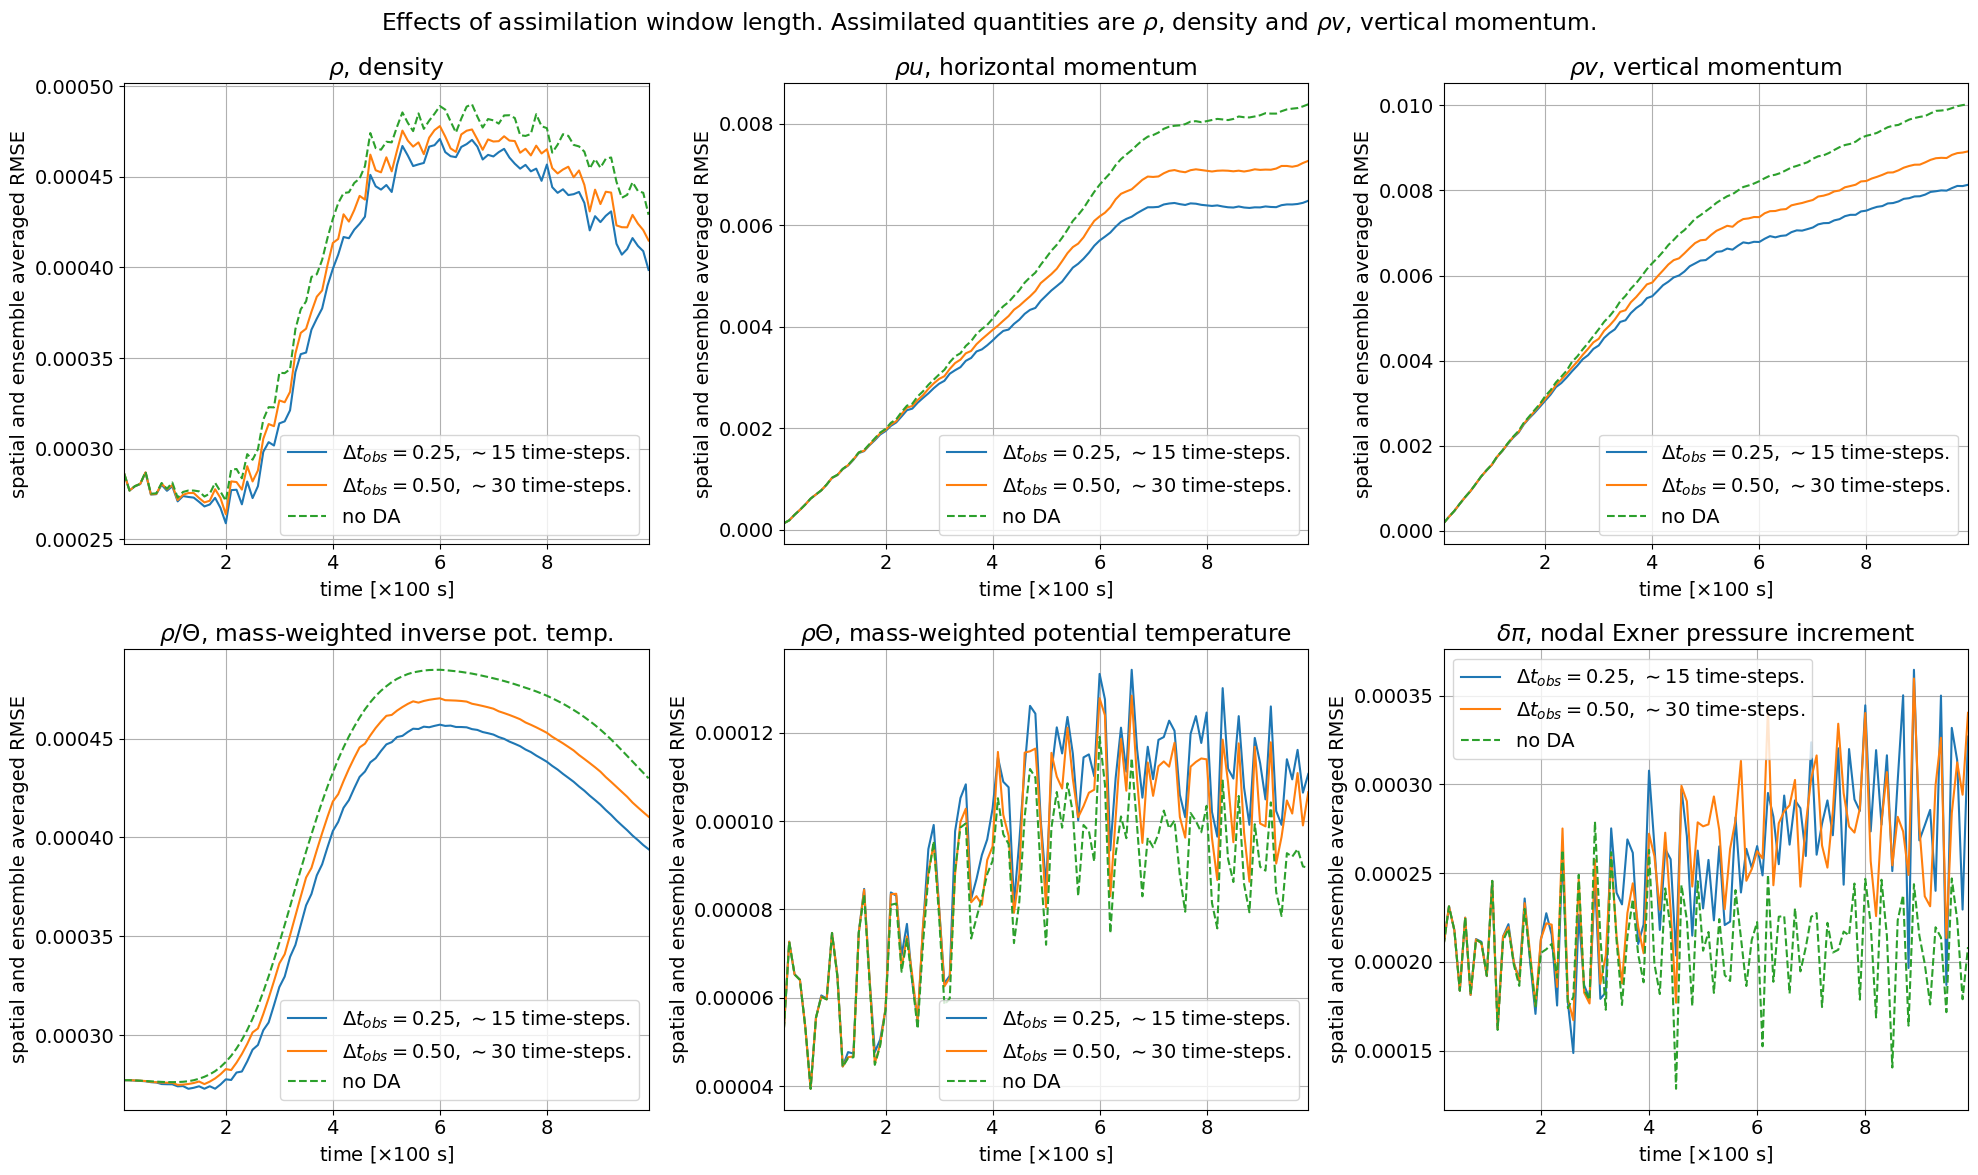

In [265]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_window_length'
title = 'Effects of assimilation window length'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_psinc_wdawloc_1.0_rho_rhov'
    ens_1_label = r'$\Delta t_{obs}=$%.2f, $\sim$%i time-steps.' %(0.25,15)
    
    ens_2_suffix = 'obs_psinc_wdawloc_1.0_rho_rhov_dawl_0.50'
    ens_2_label = r'$\Delta t_{obs}=$%.2f, $\sim$%i time-steps.' %(0.50,30)

#     ens_3_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY'
#     ens_3_label = r'{%s,%s}' %(attr_shorts['rhov'],attr_shorts['rhoY'])
    
#     ens_4_suffix = 'obs_psinc_wdawloc_1.0_rhov_p2_nodes'
#     ens_4_label = r'{%s,%s}' %(attr_shorts['rhov'],attr_shorts['p2_nodes'])

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
#     ens_3 = get_ens(ens_3_suffix, diff)
#     ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
#         diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
#         diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
#         diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
#         diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
#         diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
#     ax.plot(times,diff_ens_3, label=ens_3_label)
#     ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

# Effects of balanced IC and noisy observations

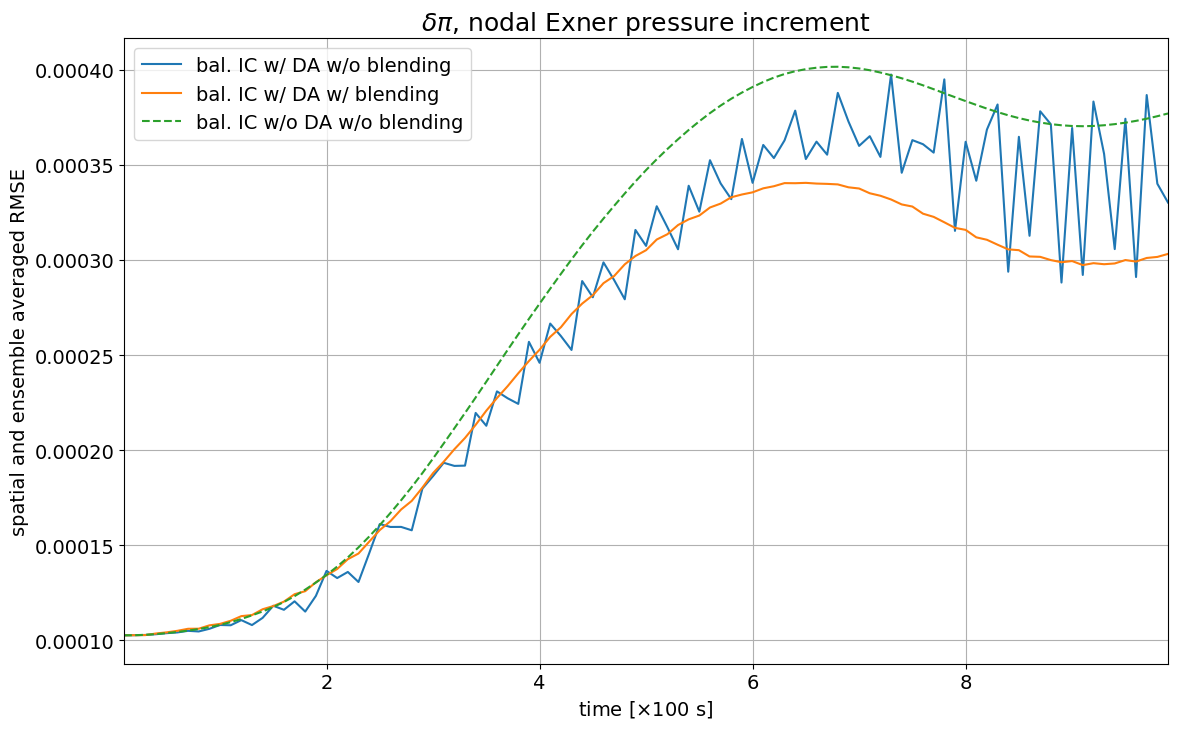

In [79]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']
attributes = ['p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

# plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [40,25]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_bal_ic'
title = 'Effects of balanced initial conditions, noisy observations and blending'

rmse_type = 'probe'
rmse_type = 'spatial'
# rmse_type = 'none'

if rmse_type == 'spatial':
    plt.style.use('default')
elif rmse_type == 'none':
    plt.style.use('seaborn-dark-palette')
    
fs = (20,12)
fs = (12,8)
pl = pt.plotter_1d(figsize=fs,fontsize=14,ncols=1,nrows=1)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

fnts = 18

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'ib_noda'
#     ens_noda_label = 'no DA, bal. IC'
    ens_noda_label = 'bal. IC w/o DA w/o blending'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'ib_obs_comp_wdawloc_1.0_rho_rhov'
#     ens_1_label = r'$F_D=1.0$, bal. IC'
    ens_1_label = r'bal. IC w/ DA w/o blending'
    
    ens_2_suffix = 'ib_obs_comp_wdawloc_4.0_rho_rhov'
    ens_2_label = r'$F_D=4.0$, bal. IC'

    ens_3_suffix = tc.cb_suffix(1,0, '%s' %('ib_obs_comp_wdawloc_1.0_rho_rhov'))
#     ens_3_label = r'$F_D=1.0$, bal. IC w/ blending'
    ens_3_label = r'bal. IC w/ DA w/ blending'
    
    ens_4_suffix = tc.cb_suffix(1,0, '%s' %('ib_obs_comp_wdawloc_4.0_rho_rhov'))
    ens_4_label = r'$F_D=4.0$, bal. IC w/ blending'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'ip_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
#         plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']), fontsize=fnts)
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))

    elif rmse_type == 'none':
        diff_noda = ens_noda[:,probe_idx[0],probe_idx[1]]
        diff_ens_1 = ens_1[:,probe_idx[0],probe_idx[1]]
        diff_ens_2 = ens_2[:,probe_idx[0],probe_idx[1]]
        diff_ens_3 = ens_3[:,probe_idx[0],probe_idx[1]]
        diff_ens_4 = ens_4[:,probe_idx[0],probe_idx[1]]
        ax.set_ylabel('%s' %attr_shorts[attribute])
        plt.suptitle("%s. Assimilated quantities are %s and %s.\nProbe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]), fontsize=fnts)
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
#     ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
#     ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)
#     ax.plot(times,psinc[:, probe_idx[0], probe_idx[1]], '--', label='ref. sol.')

    ax.set_title("%s" %attr_labels[attribute], fontsize=fnts)
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend(prop={"size":fnts-4})
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.94])
if len(attributes)>1:
    plt.savefig('%s/%s_%s.pdf' %(py_directory,fn,rmse_type))
else:
    plt.savefig('%s/%s_%s_%s.pdf' %(py_directory,fn,rmse_type,attributes[0]))
plt.show()

# Effects of number of ensemble members

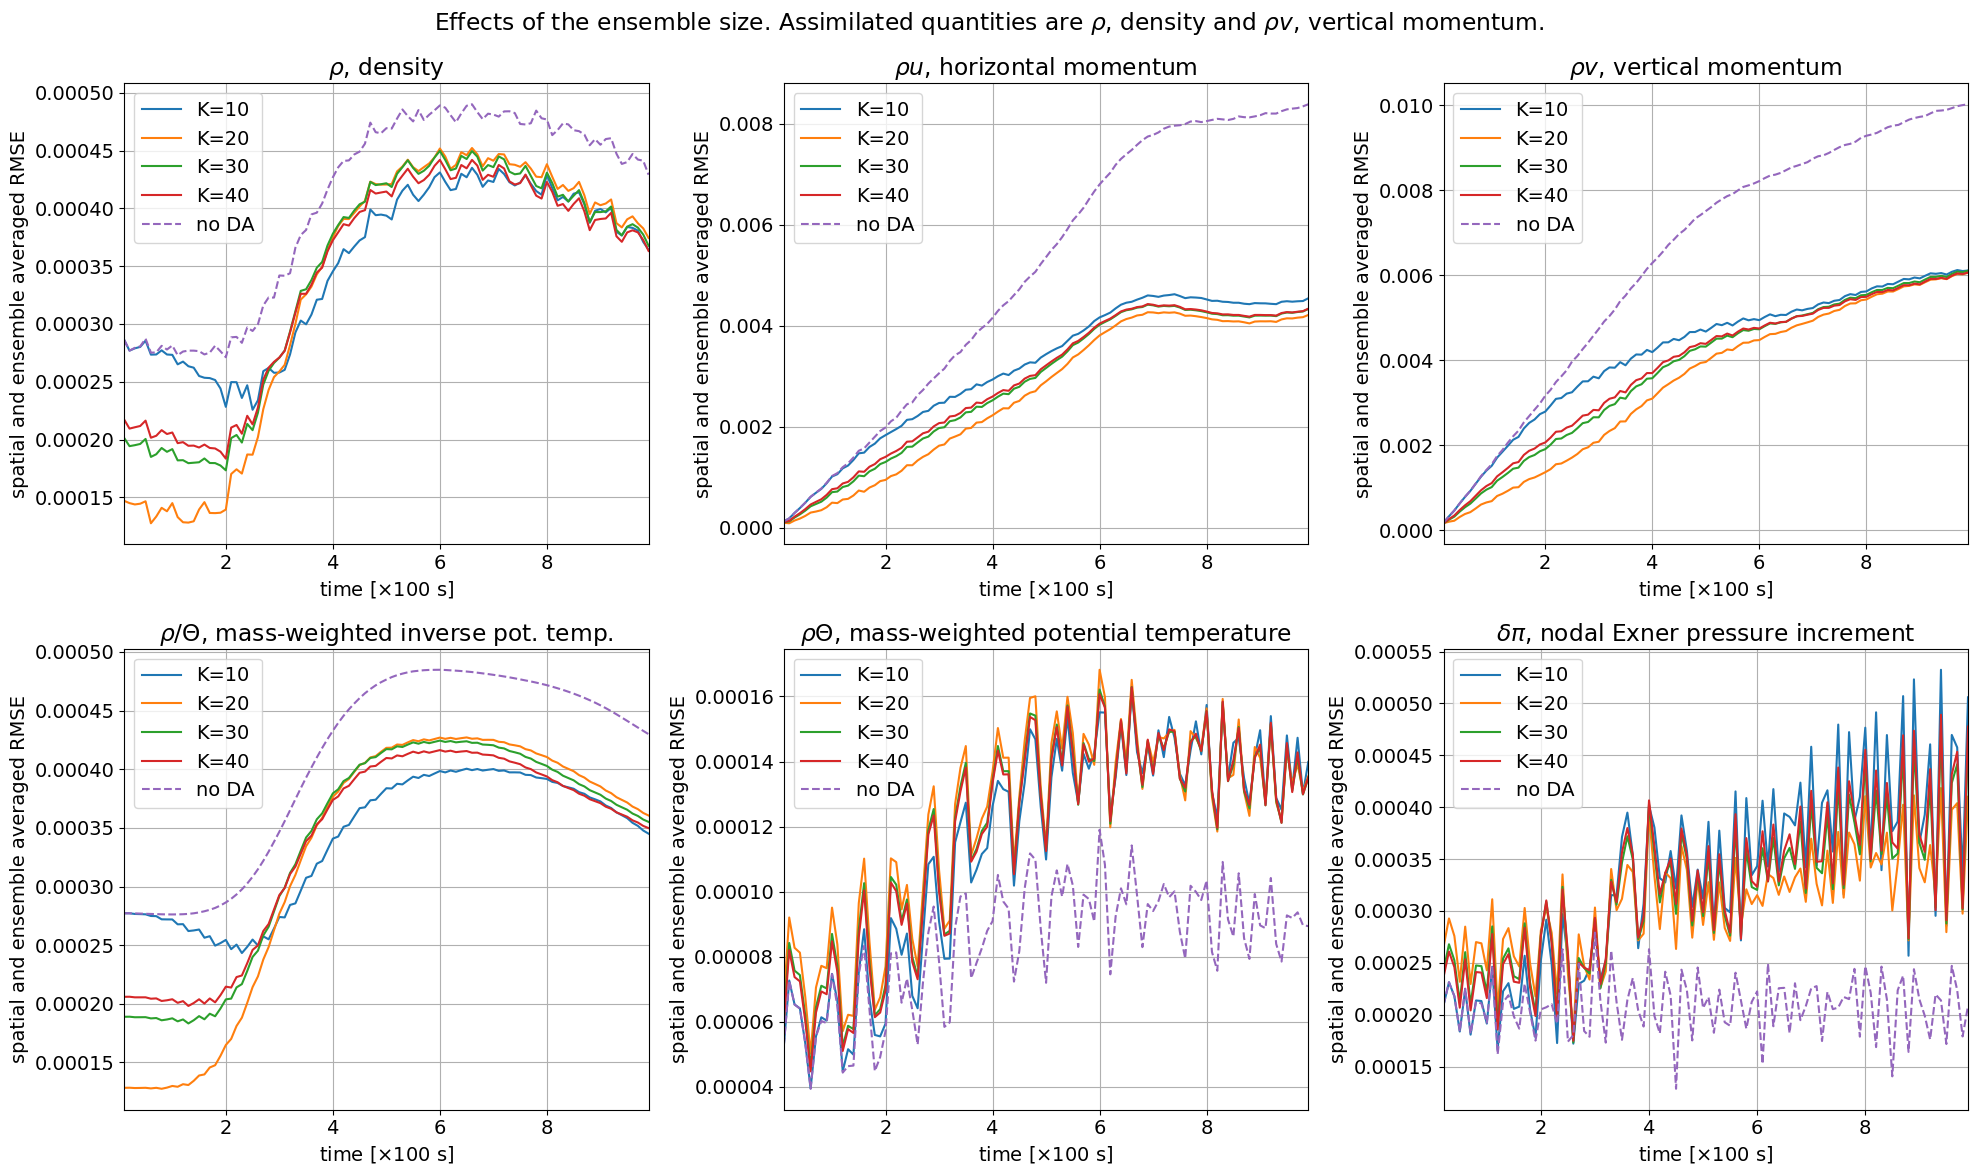

In [266]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_ens_size'
title = 'Effects of the ensemble size'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

FD = 4.0

def get_ens(sfx,diff,N=10):
    return tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
    ens_1_label = r'K=10'
    
    ens_2_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
    ens_2_label = r'K=20'

    ens_3_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
    ens_3_label = r'K=30'
    
    ens_4_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
    ens_4_label = r'K=40'

    ens_1 = get_ens(ens_1_suffix, diff, 10)
    ens_2 = get_ens(ens_2_suffix, diff, 20)
    ens_3 = get_ens(ens_3_suffix, diff, 30)
    ens_4 = get_ens(ens_4_suffix, diff, 40)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
    ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s_%.1f.pdf' %(py_directory,fn,FD))
plt.show()

# Ensemble plotter for ensemble comparisons

In [ ]:
import random

random.seed(444)

N = 10
FD = 1.0
# FD = 4.0
blend = True
blend = False
sfx = 'ib_noda'
# sfx = 'ib_obs_comp_wdawloc_%.1f' %FD
if blend==True: sfx = tc.cb_suffix(1,0, '%s' %(sfx))
bld_tag = 'with blending' if blend==True else 'without blending'
print(sfx)
attribute = 'p2_nodes'
times = [10.0]

ens = tc.get_ensemble(times, N, attribute, sfx)
print(ens.shape)
mean = np.mean(ens[0],axis=0)
print(np.array(mean).shape)
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()

class oo(object):
    def __init__(self):
        None
        
take_diff = True
if not 'noda' in sfx:
    res = oo()
# setattr(oo,'mean',mean)

for ens_at in ens:
    ncolslen = int((ens_at.shape)[0]/1)
    print(ncolslen)
    fs = (18,3)
    fs = (14,8)
    
    arr_lst = [[arr.T,'member index %i' %n] for n,arr in enumerate(ens_at)]
    arr_lst = random.sample(arr_lst, k=3)
    arr_lst.append(mean)
    ncolslen = int(len(arr_lst)/2)
#     print(ncolslen)

    if take_diff == True:
        for k,arr in enumerate(arr_lst):
            if not 'noda' in sfx:
                print(k)
                setattr(res,str(k),arr[0]) 
            else:
                arr_lst[k][0] = getattr(res,str(k)) - arr[0]
#                 arr_lst[k][0] = arr[0] - psinc[-1].T
    
    pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

    x_axs = np.arange(-10.0,15.0,5.0)
    y_axs = np.arange(0,12.5,2.5)
    x_loc = np.linspace(0,Nx-1,len(x_axs))
    y_loc = np.linspace(0,Ny-1,len(y_axs))
    x_label = r'x [km]'
    y_label = r'y [km]'

    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

    if 'noda' in sfx and take_diff == False:
        st = 'Ensemble with no data assimilation. Quantity is %s at output time $t=$%.1fs.' %(attr_labels[attribute], times[-1]*100)
    elif take_diff == True:
        st = '(ensemble w/ DA and w/ blending) - (ensemble w/o DA and w/o blending)'
    else:
#         st = "Ensemble with $F_D=$%.1f %s. Quantity is %s at output time $t=$%.1fs." %(FD, bld_tag, attr_labels[attribute],times[-1]*100)
        st = "Ensemble with data assimilation %s. Quantity is %s at output time $t=$%.1fs." %(bld_tag, attr_labels[attribute],times[-1]*100)
    _ = pl.plot(aspect='equal',method='imshow',suptitle=st)
    
    if take_diff == True:
        pl.save_fig('../img/bal_ic_diff')
    else:
        pl.save_fig('../img/bal_ic_%s' %sfx)

In [68]:
print(vars(oo))

{'__module__': '__main__', '__init__': <function oo.__init__ at 0x7f6550bb6840>, '__dict__': <attribute '__dict__' of 'oo' objects>, '__weakref__': <attribute '__weakref__' of 'oo' objects>, '__doc__': None}
